# Import Libraries

In [229]:
import yfinance as yf
import pandas as pd
from ta import add_all_ta_features
from ta.utils import dropna
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import ta
#import talib
from fracdiff.sklearn import Fracdiff
import numpy as np


# Download data

In [230]:
aapl = yf.download('AAPL', start='2013-01-01', end='2024-01-01')

c:\Conda\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


In [231]:
sp500 = yf.download('^GSPC', start='2013-01-01', end='2024-01-01')

# Align AAPL data with S&P 500 data
aapl['SP500'] = sp500['Close'].reindex(aapl.index).fillna(method='ffill')
aapl['SP500_diff'] = aapl['SP500'].diff()


c:\Conda\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16068\1251857120.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  aapl['SP500'] = sp500['Close'].reindex(aapl.index).fillna(method='ffill')


# Adding Technnical Indicators

In [232]:
aapl = add_all_ta_features(
    aapl, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)

c:\Conda\Lib\site-packages\ta\trend.py:1030: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self._psar[i] = high2


# Data Labelling

In [233]:
aapl["Tomorrow"] = aapl["Close"].shift(-1)
aapl['diff'] = aapl['Close'].diff()
aapl["Target"] = (aapl["Tomorrow"]> aapl["Close"]).astype(int)

In [234]:
aapl.dropna(inplace=True)

# Data Preprocessing

In [235]:
aapl['trend_sma_fast-close'] = aapl['trend_sma_fast'] - aapl['Close']
aapl['trend_sma_slow-close'] = aapl['trend_sma_slow'] - aapl['Close']
aapl['trend_ema_fast-close'] = aapl['trend_ema_fast'] - aapl['Close']
aapl['trend_ema_slow-close'] = aapl['trend_ema_slow'] - aapl['Close']
aapl['volatility_bbm-close'] = aapl['volatility_bbm'] - aapl['Close']
aapl['volatility_bbh-close'] = aapl['volatility_bbh'] - aapl['Close']
aapl['volatility_bbl-close'] = aapl['volatility_bbl'] - aapl['Close']


In [236]:
# Initialize the Fracdiff object
fd = Fracdiff(0.9)

"""# Apply fractional differencing to the 'Close' price
aapl['Close_fdiff'] = fd.fit_transform(aapl[['Close']].values)"""

"# Apply fractional differencing to the 'Close' price\naapl['Close_fdiff'] = fd.fit_transform(aapl[['Close']].values)"

In [237]:
for indicator in aapl.columns:
    prob = adfuller(aapl[indicator])[1]
    print(indicator, prob)
    if prob > 0.05 and indicator != "Tomorrow" and indicator != "Target":
        fdindicator = indicator + '_fdiff'
        #pctindicator = indicator + '_pctdiff'
        aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)
        #aapl[pctindicator] = aapl[indicator].pct_change()
        aapl.drop(columns=indicator, inplace=True)

aapl = aapl.iloc[2:]

Open 0.9836527570729688
High 0.9864309012760412
Low 0.9861665578754738
Close 0.9840084477035261


C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16068\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16068\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16068\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

Adj Close 0.9861664534215286
Volume 0.00018840313537896525
SP500 0.9190769765061895
SP500_diff 2.3275104670171334e-29


C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16068\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16068\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)


volume_adi 0.9745645877368917
volume_obv 0.3391985298485397
volume_cmf 1.4373148183011977e-10
volume_fi 6.077047875191317e-15


C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16068\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16068\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)


volume_em 1.0285848484379612e-16
volume_sma_em 1.575696168636781e-12
volume_vpt 0.19742821393977744
volume_vwap 0.9934010310244431


C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16068\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16068\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16068\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

volume_mfi 3.604985542678232e-11
volume_nvi 0.9986013390318509
volatility_bbm 0.9910678706621816
volatility_bbh 0.9848872567465559


C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16068\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16068\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16068\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

volatility_bbl 0.9921190781385685
volatility_bbw 4.4047663699849226e-10
volatility_bbp 1.354537282095765e-20
volatility_bbhi 0.0
volatility_bbli 2.9253134044172846e-30
volatility_kcc 0.9861331399967361
volatility_kch 0.9847842129186546
volatility_kcl 0.985498032947879


C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16068\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16068\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16068\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

volatility_kcw 7.073792040740221e-06
volatility_kcp 1.8143259251626973e-23
volatility_kchi 0.0
volatility_kcli 6.625205159384735e-29
volatility_dcl 0.9909296864565695
volatility_dch 0.9798834096141766
volatility_dcm 0.9907075409041907
volatility_dcw 1.3792928886735316e-07


C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16068\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16068\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16068\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

volatility_dcp 3.891145995566017e-19
volatility_atr 0.35875629924508784
volatility_ui 1.91242646734886e-09
trend_macd 1.0956620654067817e-12


C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16068\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)


trend_macd_signal 3.873789707090969e-11
trend_macd_diff 1.0390365670920682e-22
trend_sma_fast 0.9849620545196136
trend_sma_slow 0.9823377091362783


C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16068\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16068\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16068\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

trend_ema_fast 0.9875295049774706
trend_ema_slow 0.990970738160629
trend_vortex_ind_pos 5.452428499131822e-11
trend_vortex_ind_neg 1.0061275685534362e-12
trend_vortex_ind_diff 1.8506019094521313e-11
trend_trix 6.034825794286681e-13
trend_mass_index 3.3267714706093406e-15
trend_dpo 1.432193766280988e-29
trend_kst 3.43262627730892e-14
trend_kst_sig 7.756631092874925e-16
trend_kst_diff 4.494312251452945e-19
trend_ichimoku_conv 0.9867262944112524


C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16068\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16068\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16068\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

trend_ichimoku_base 0.9900416031366271
trend_ichimoku_a 0.9886067381159253
trend_ichimoku_b 0.9888076599943432
trend_stc 3.1816334727680875e-27
trend_adx 2.437101542998101e-10
trend_adx_pos 3.9823318216081593e-16
trend_adx_neg 8.998326106783045e-15
trend_cci 1.763292432961158e-20
trend_visual_ichimoku_a 0.9858872922882451


C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16068\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16068\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)


trend_visual_ichimoku_b 0.989494784704061
trend_aroon_up 2.7642011720889245e-17
trend_aroon_down 9.861452601878262e-19
trend_aroon_ind 1.5336130990258686e-11
trend_psar_up 0.9845697418169118
trend_psar_down 0.9828386251655173
trend_psar_up_indicator 0.0
trend_psar_down_indicator 1.418200823168112e-26


C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16068\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16068\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)


momentum_rsi 3.749722209668798e-17
momentum_stoch_rsi 5.456840586025656e-23
momentum_stoch_rsi_k 3.918892404992065e-20
momentum_stoch_rsi_d 4.340186654686344e-22
momentum_tsi 2.4289214253690855e-12
momentum_uo 2.738697472979864e-13
momentum_stoch 1.9132173484948738e-17
momentum_stoch_signal 2.1977283513821558e-14
momentum_wr 1.9132173484951354e-17
momentum_ao 3.1046258838866674e-12
momentum_roc 3.4894449361585475e-14
momentum_ppo 2.1668617773238276e-13
momentum_ppo_signal 1.6402700942102074e-12
momentum_ppo_hist 7.08912003953949e-23
momentum_pvo 2.0454315264907338e-25
momentum_pvo_signal 1.1490293999981018e-23
momentum_pvo_hist 2.295367697523833e-28
momentum_kama 0.9885853154620968
others_dr 7.201007339725326e-30
others_dlr 8.334195546565256e-30
others_cr 0.9840084477035271


C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16068\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16068\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)


Tomorrow 0.9832051678547812
diff 2.3948366438088987e-22
Target 0.0
trend_sma_fast-close 1.1587396226762037e-18
trend_sma_slow-close 1.8676431246932352e-17
trend_ema_fast-close 6.329384428050271e-17
trend_ema_slow-close 6.148378276809673e-14
volatility_bbm-close 2.1528942455832272e-16
volatility_bbh-close 4.2383987144352315e-07
volatility_bbl-close 1.0421810058096516e-07


In [238]:
labels = aapl['Target'].tolist()
aapl.drop(columns="Target",inplace=True)
aapl.drop(columns="Tomorrow",inplace=True)

In [239]:
aapl.columns

Index(['Volume', 'SP500_diff', 'volume_cmf', 'volume_fi', 'volume_em',
       'volume_sma_em', 'volume_mfi', 'volatility_bbw', 'volatility_bbp',
       'volatility_bbhi',
       ...
       'trend_ichimoku_conv_fdiff', 'trend_ichimoku_base_fdiff',
       'trend_ichimoku_a_fdiff', 'trend_ichimoku_b_fdiff',
       'trend_visual_ichimoku_a_fdiff', 'trend_visual_ichimoku_b_fdiff',
       'trend_psar_up_fdiff', 'trend_psar_down_fdiff', 'momentum_kama_fdiff',
       'others_cr_fdiff'],
      dtype='object', length=102)

In [240]:
len(aapl)

2764

In [241]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(aapl)

# Creating Sequences for LSTM

In [242]:
sequence_length = 60

# Function to create sequences
def create_sequences(data, labels, seq_length):
    xs = []
    ys = []

    for i in range(len(data)-seq_length):
        x = data[i:(i+seq_length)]
        y = labels[i+seq_length]
        xs.append(x)
        ys.append(y)
    
    return np.array(xs), np.array(ys)


X_all, y_all = create_sequences(aapl, labels, sequence_length)

In [243]:
windowLength = 2514
slidingLength = 30
test_length = len(X_all) - windowLength
X_train_list = []
y_train_list = []
X_test_list = []
y_test_list = []
for i in range(0,test_length,slidingLength):
    X_train_list.append(X_all[i:windowLength+i])
    y_train_list.append(y_all[i:windowLength+i])
    X_test_list.append(X_all[windowLength+i:min(windowLength + i + slidingLength, len(X_all))])
    y_test_list.append(y_all[windowLength+i:min(windowLength + i + slidingLength, len(X_all))])
    print(windowLength+i+slidingLength)
    if windowLength+i+slidingLength >= len(X_all):
        break


2544
2574
2604
2634
2664
2694
2724


In [244]:
test_length, len(X_train_list), len(X_all)

(190, 7, 2704)

# DataLoader for LSTM 

In [245]:
import torch
from torch.utils.data import Dataset, DataLoader

class StockDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]
    

In [246]:
def createDataLoader(X_train, y_train,X_test,y_test):
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

    # Create the dataset
    traindataset = StockDataset(X_train_tensor, y_train_tensor)

    # Create the DataLoader
    trainLoader = DataLoader(traindataset, batch_size=32, shuffle=False)

    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

    # Create the dataset
    testdataset = StockDataset(X_test_tensor, y_test_tensor)

    # Create the DataLoader
    testLoader = DataLoader(testdataset, batch_size=32, shuffle=False)
    return trainLoader, testLoader

# LSTM Model Training

In [247]:
import torch.nn as nn

class StockPredictor(nn.Module):
    def __init__(self, num_features, hidden_units, num_layers):
        super(StockPredictor, self).__init__()
        self.lstm = nn.LSTM(num_features, hidden_units, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_units, 1)

    def forward(self, x):
        _, (h_n, _) = self.lstm(x)
        out = self.fc(h_n[-1])
        return torch.sigmoid(out)

# Define the model
num_features = X_train_list[0].shape[-1]  # Number of features
hidden_units = 200  # Number of hidden units
num_layers = 2  # Number of LSTM layers



In [248]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from typing import Tuple

# Assuming 'StockPredictor' is a class derived from nn.Module
# and 'trainLoader' is an instance of DataLoader

def train_model(
    model: nn.Module, 
    train_loader: DataLoader, 
    criterion: nn.Module, 
    optimizer: torch.optim.Optimizer, 
    num_epochs: int) -> Tuple[nn.Module, list]:
    """
    Train the model and return the model with the minimum loss.

    Parameters:
    - model: The neural network model to train.
    - train_loader: DataLoader for the training data.
    - criterion: Loss function.
    - optimizer: Optimizer.
    - num_epochs: Number of epochs to train.
    
    Returns:
    - min_loss_model: The model with the minimum loss achieved during training.
    - epoch_loss_history: List of loss values recorded at the end of each epoch.
    """
    min_loss = float('inf')
    min_loss_model = StockPredictor(num_features, hidden_units, num_layers)  # Assumes these are attributes of your model
    epoch_loss_history = []
    model.train()
    for epoch in range(num_epochs):
        for features, labels in train_loader:
            # Forward pass
            predictions = model(features).squeeze()
            loss = criterion(predictions, labels)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        epoch_loss_history.append(loss.item())
        if loss.item() < min_loss:
            min_loss = loss.item()
            min_loss_model.load_state_dict(model.state_dict())  # Copy model weights

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Minimum Loss: {min_loss:.4f}')

    return min_loss_model, epoch_loss_history

# Usage example
model = StockPredictor(num_features, hidden_units, num_layers)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
num_epochs = 150

# Assuming 'trainLoader' is defined elsewhere

# minLossModel, loss_history = train_model(model, trainLoader, criterion, optimizer, num_epochs)

# Evaluation

In [249]:
import torch
from torch.utils.data import DataLoader

def evaluate_model(model: torch.nn.Module, test_loader: DataLoader) -> Tuple[list, list, list]:
    """
    Evaluate the model on the test set.

    Parameters:
    - model: The trained neural network model for evaluation.
    - test_loader: DataLoader for the test data.

    Returns:
    - probabilities: List of raw output probabilities from the model.
    - predictions: List of predicted classes based on the output probabilities.
    - actuals: List of actual labels.
    """
    model.eval()  # Set the model to evaluation mode

    probabilities = []
    predictions = []
    actuals = []

    with torch.no_grad():  # No need to track the gradients
        for features, labels in test_loader:
            # Forward pass to get output/prediction
            outputs = model(features).squeeze()

            # Since we're using sigmoid, we will round the outputs to get the binary class
            predicted_classes = torch.round(outputs)
            
            # In case of single-element batches, add an extra dimension
            if predicted_classes.ndim == 0:
                predicted_classes = predicted_classes.unsqueeze(0)

            # Store predictions and actual labels
            probabilities.extend(outputs.cpu().numpy())
            predictions.extend(predicted_classes.cpu().numpy())
            actuals.extend(labels.cpu().numpy())

    return probabilities, predictions, actuals

# Usage example
# Assuming 'minLossModel' is the trained model and 'testLoader' is defined elsewhere

# probabilities, predictions, actuals = evaluate_model(minLossModel, testLoader)

In [250]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,roc_curve, roc_auc_score

def evaluation(predictions, probabilities, actuals, verbose=1, threshold = 0.5):
    probabilities_array = np.array(probabilities)
    predictions_array = (probabilities_array >= threshold).astype(int)
    actuals_array = np.array(actuals)

    # Calculate various classification metrics
    accuracy = accuracy_score(actuals_array, predictions_array)
    precision = precision_score(actuals_array, predictions_array)
    recall = recall_score(actuals_array, predictions_array)
    f1 = f1_score(actuals_array, predictions_array)
    conf_matrix = confusion_matrix(actuals_array, predictions_array)
    auc_score = roc_auc_score(actuals_array, probabilities_array)

    # Print out the metrics
    if verbose:
        print(f'Accuracy: {accuracy:.4f}')
        print(f'Precision: {precision:.4f}')
        print(f'Recall: {recall:.4f}')
        print(f'F1 Score: {f1:.4f}')
        print(f'AUC Score: {auc_score:.4f}')
        print(f'Confusion Matrix:\n{conf_matrix}')

In [254]:
from tqdm import tqdm

num_epochs = 150
probabilities, predictions, actuals, loss_history = [], [] ,[], []
for i in tqdm(range(len(X_train_list))):
    print(f'round {i+1}')
    model = StockPredictor(num_features, hidden_units, num_layers)
    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
    trainLoader, testLoader = createDataLoader(X_train_list[i],y_train_list[i],X_test_list[i],y_test_list[i])
    model, loss_history_tmp = train_model(model, trainLoader, criterion, optimizer, num_epochs)
    probabilities_tmp, predictions_tmp, actuals_tmp = evaluate_model(model, testLoader)
    probabilities.extend(probabilities_tmp)
    predictions.extend(predictions_tmp)
    actuals.extend(actuals_tmp)
    loss_history.append(loss_history_tmp)
    print('threshold = 0.5')
    evaluation(predictions=predictions_tmp, probabilities=probabilities_tmp, actuals=actuals_tmp)
    print('threshold = 0.55')
    evaluation(predictions=predictions_tmp, probabilities=probabilities_tmp, actuals=actuals_tmp, threshold=0.55)

    

  0%|          | 0/7 [00:00<?, ?it/s]

round 1
Epoch [10/150], Loss: 0.6502, Minimum Loss: 0.6502
Epoch [20/150], Loss: 0.5966, Minimum Loss: 0.5966
Epoch [30/150], Loss: 0.5597, Minimum Loss: 0.5597
Epoch [40/150], Loss: 0.5389, Minimum Loss: 0.5325
Epoch [50/150], Loss: 0.4906, Minimum Loss: 0.4906
Epoch [60/150], Loss: 0.4507, Minimum Loss: 0.4507
Epoch [70/150], Loss: 0.3944, Minimum Loss: 0.3944
Epoch [80/150], Loss: 0.2913, Minimum Loss: 0.2913
Epoch [90/150], Loss: 0.2523, Minimum Loss: 0.2523
Epoch [100/150], Loss: 0.3038, Minimum Loss: 0.2318
Epoch [110/150], Loss: 0.1291, Minimum Loss: 0.1291
Epoch [120/150], Loss: 0.1151, Minimum Loss: 0.0834
Epoch [130/150], Loss: 0.0648, Minimum Loss: 0.0648
Epoch [140/150], Loss: 0.0549, Minimum Loss: 0.0461


 14%|█▍        | 1/7 [06:08<36:49, 368.19s/it]

Epoch [150/150], Loss: 0.0318, Minimum Loss: 0.0246
threshold = 0.5
Accuracy: 0.6000
Precision: 0.5833
Recall: 0.5000
F1 Score: 0.5385
AUC Score: 0.5625
Confusion Matrix:
[[11  5]
 [ 7  7]]
threshold = 0.55
Accuracy: 0.6000
Precision: 0.5833
Recall: 0.5000
F1 Score: 0.5385
AUC Score: 0.5625
Confusion Matrix:
[[11  5]
 [ 7  7]]
round 2
Epoch [10/150], Loss: 0.6660, Minimum Loss: 0.6660
Epoch [20/150], Loss: 0.5955, Minimum Loss: 0.5878
Epoch [30/150], Loss: 0.5366, Minimum Loss: 0.5366
Epoch [40/150], Loss: 0.4878, Minimum Loss: 0.4878
Epoch [50/150], Loss: 0.4584, Minimum Loss: 0.4484
Epoch [60/150], Loss: 0.4007, Minimum Loss: 0.3974
Epoch [70/150], Loss: 0.3464, Minimum Loss: 0.3217
Epoch [80/150], Loss: 0.3265, Minimum Loss: 0.2874
Epoch [90/150], Loss: 0.2593, Minimum Loss: 0.1977
Epoch [100/150], Loss: 0.1461, Minimum Loss: 0.1461
Epoch [110/150], Loss: 0.3136, Minimum Loss: 0.0801
Epoch [120/150], Loss: 0.1623, Minimum Loss: 0.0721
Epoch [130/150], Loss: 0.0277, Minimum Loss: 0.0

 29%|██▊       | 2/7 [12:13<30:33, 366.61s/it]

Epoch [150/150], Loss: 0.0186, Minimum Loss: 0.0113
threshold = 0.5
Accuracy: 0.5000
Precision: 0.5294
Recall: 0.5625
F1 Score: 0.5455
AUC Score: 0.4598
Confusion Matrix:
[[6 8]
 [7 9]]
threshold = 0.55
Accuracy: 0.4000
Precision: 0.4286
Recall: 0.3750
F1 Score: 0.4000
AUC Score: 0.4598
Confusion Matrix:
[[ 6  8]
 [10  6]]
round 3
Epoch [10/150], Loss: 0.6716, Minimum Loss: 0.6716
Epoch [20/150], Loss: 0.6092, Minimum Loss: 0.6092
Epoch [30/150], Loss: 0.5791, Minimum Loss: 0.5791
Epoch [40/150], Loss: 0.5431, Minimum Loss: 0.5431
Epoch [50/150], Loss: 0.5209, Minimum Loss: 0.5026
Epoch [60/150], Loss: 0.6285, Minimum Loss: 0.4973
Epoch [70/150], Loss: 0.5225, Minimum Loss: 0.4188
Epoch [80/150], Loss: 0.3705, Minimum Loss: 0.3705
Epoch [90/150], Loss: 0.4757, Minimum Loss: 0.3705
Epoch [100/150], Loss: 0.2762, Minimum Loss: 0.2689
Epoch [110/150], Loss: 0.3829, Minimum Loss: 0.1486
Epoch [120/150], Loss: 0.3440, Minimum Loss: 0.1428
Epoch [130/150], Loss: 0.0608, Minimum Loss: 0.0608


 43%|████▎     | 3/7 [18:19<24:25, 366.45s/it]

Epoch [150/150], Loss: 0.1338, Minimum Loss: 0.0309
threshold = 0.5
Accuracy: 0.5000
Precision: 0.5238
Recall: 0.6875
F1 Score: 0.5946
AUC Score: 0.4866
Confusion Matrix:
[[ 4 10]
 [ 5 11]]
threshold = 0.55
Accuracy: 0.5000
Precision: 0.5238
Recall: 0.6875
F1 Score: 0.5946
AUC Score: 0.4866
Confusion Matrix:
[[ 4 10]
 [ 5 11]]
round 4
Epoch [10/150], Loss: 0.6113, Minimum Loss: 0.6113
Epoch [20/150], Loss: 0.5041, Minimum Loss: 0.5041
Epoch [30/150], Loss: 0.4850, Minimum Loss: 0.4736
Epoch [40/150], Loss: 0.4059, Minimum Loss: 0.4059
Epoch [50/150], Loss: 0.3913, Minimum Loss: 0.3804
Epoch [60/150], Loss: 0.3481, Minimum Loss: 0.3481
Epoch [70/150], Loss: 0.3346, Minimum Loss: 0.3215
Epoch [80/150], Loss: 0.2920, Minimum Loss: 0.2920
Epoch [90/150], Loss: 0.2582, Minimum Loss: 0.2582
Epoch [100/150], Loss: 0.2315, Minimum Loss: 0.2156
Epoch [110/150], Loss: 0.1972, Minimum Loss: 0.1972
Epoch [120/150], Loss: 0.2148, Minimum Loss: 0.1706
Epoch [130/150], Loss: 0.2194, Minimum Loss: 0.1

 57%|█████▋    | 4/7 [24:26<18:19, 366.65s/it]

Epoch [150/150], Loss: 0.1082, Minimum Loss: 0.0993
threshold = 0.5
Accuracy: 0.7000
Precision: 0.7222
Recall: 0.7647
F1 Score: 0.7429
AUC Score: 0.7692
Confusion Matrix:
[[ 8  5]
 [ 4 13]]
threshold = 0.55
Accuracy: 0.7000
Precision: 0.7222
Recall: 0.7647
F1 Score: 0.7429
AUC Score: 0.7692
Confusion Matrix:
[[ 8  5]
 [ 4 13]]
round 5
Epoch [10/150], Loss: 0.5652, Minimum Loss: 0.5652
Epoch [20/150], Loss: 0.4477, Minimum Loss: 0.4477
Epoch [30/150], Loss: 0.4090, Minimum Loss: 0.4090
Epoch [40/150], Loss: 0.3736, Minimum Loss: 0.3736
Epoch [50/150], Loss: 0.3483, Minimum Loss: 0.3483
Epoch [60/150], Loss: 0.3063, Minimum Loss: 0.3063
Epoch [70/150], Loss: 0.2764, Minimum Loss: 0.2755
Epoch [80/150], Loss: 0.2362, Minimum Loss: 0.2358
Epoch [90/150], Loss: 0.1874, Minimum Loss: 0.1874
Epoch [100/150], Loss: 0.1756, Minimum Loss: 0.1592
Epoch [110/150], Loss: 0.1300, Minimum Loss: 0.1264
Epoch [120/150], Loss: 0.1115, Minimum Loss: 0.0937
Epoch [130/150], Loss: 0.0724, Minimum Loss: 0.0

 71%|███████▏  | 5/7 [30:26<12:07, 363.98s/it]

Epoch [150/150], Loss: 0.0477, Minimum Loss: 0.0423
threshold = 0.5
Accuracy: 0.4000
Precision: 0.4706
Recall: 0.4706
F1 Score: 0.4706
AUC Score: 0.4389
Confusion Matrix:
[[4 9]
 [9 8]]
threshold = 0.55
Accuracy: 0.3667
Precision: 0.4375
Recall: 0.4118
F1 Score: 0.4242
AUC Score: 0.4389
Confusion Matrix:
[[ 4  9]
 [10  7]]
round 6
Epoch [10/150], Loss: 0.6012, Minimum Loss: 0.6012
Epoch [20/150], Loss: 0.3989, Minimum Loss: 0.3967
Epoch [30/150], Loss: 0.3865, Minimum Loss: 0.3470
Epoch [40/150], Loss: 0.3171, Minimum Loss: 0.3116
Epoch [50/150], Loss: 0.2709, Minimum Loss: 0.2709
Epoch [60/150], Loss: 0.2380, Minimum Loss: 0.2380
Epoch [70/150], Loss: 0.2104, Minimum Loss: 0.2104
Epoch [80/150], Loss: 0.1810, Minimum Loss: 0.1810
Epoch [90/150], Loss: 0.1568, Minimum Loss: 0.1568
Epoch [100/150], Loss: 0.1303, Minimum Loss: 0.1303
Epoch [110/150], Loss: 0.1021, Minimum Loss: 0.1021
Epoch [120/150], Loss: 0.0854, Minimum Loss: 0.0833
Epoch [130/150], Loss: 0.0641, Minimum Loss: 0.0641


 86%|████████▌ | 6/7 [36:20<06:00, 360.63s/it]

Epoch [150/150], Loss: 0.0196, Minimum Loss: 0.0196
threshold = 0.5
Accuracy: 0.3333
Precision: 0.4667
Recall: 0.3684
F1 Score: 0.4118
AUC Score: 0.4019
Confusion Matrix:
[[ 3  8]
 [12  7]]
threshold = 0.55
Accuracy: 0.3333
Precision: 0.4667
Recall: 0.3684
F1 Score: 0.4118
AUC Score: 0.4019
Confusion Matrix:
[[ 3  8]
 [12  7]]
round 7
Epoch [10/150], Loss: 0.6576, Minimum Loss: 0.6576
Epoch [20/150], Loss: 0.6271, Minimum Loss: 0.6254
Epoch [30/150], Loss: 0.6189, Minimum Loss: 0.6128
Epoch [40/150], Loss: 0.6013, Minimum Loss: 0.6007
Epoch [50/150], Loss: 0.5857, Minimum Loss: 0.5857
Epoch [60/150], Loss: 0.5813, Minimum Loss: 0.5584
Epoch [70/150], Loss: 0.5342, Minimum Loss: 0.5342
Epoch [80/150], Loss: 0.5078, Minimum Loss: 0.5035
Epoch [90/150], Loss: 0.4720, Minimum Loss: 0.4681
Epoch [100/150], Loss: 0.4287, Minimum Loss: 0.4287
Epoch [110/150], Loss: 0.4123, Minimum Loss: 0.3758
Epoch [120/150], Loss: 0.3167, Minimum Loss: 0.3105
Epoch [130/150], Loss: 0.2796, Minimum Loss: 0.2

100%|██████████| 7/7 [42:18<00:00, 362.62s/it]

Epoch [150/150], Loss: 0.2053, Minimum Loss: 0.1944
threshold = 0.5
Accuracy: 0.2000
Precision: 0.1429
Recall: 0.3333
F1 Score: 0.2000
AUC Score: 0.4286
Confusion Matrix:
[[1 6]
 [2 1]]
threshold = 0.55
Accuracy: 0.2000
Precision: 0.1429
Recall: 0.3333
F1 Score: 0.2000
AUC Score: 0.4286
Confusion Matrix:
[[1 6]
 [2 1]]


In [255]:
evaluation(predictions, probabilities, actuals, threshold=0.5)

Accuracy: 0.4895
Precision: 0.5234
Recall: 0.5490
F1 Score: 0.5359
AUC Score: 0.5030
Confusion Matrix:
[[37 51]
 [46 56]]


# Loss Curve

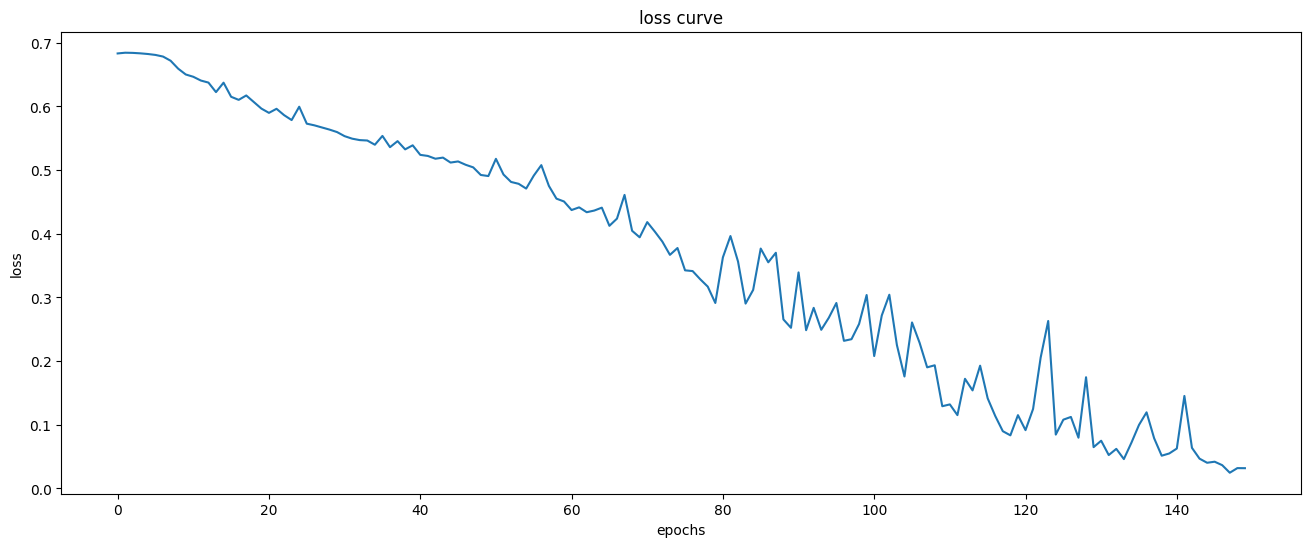

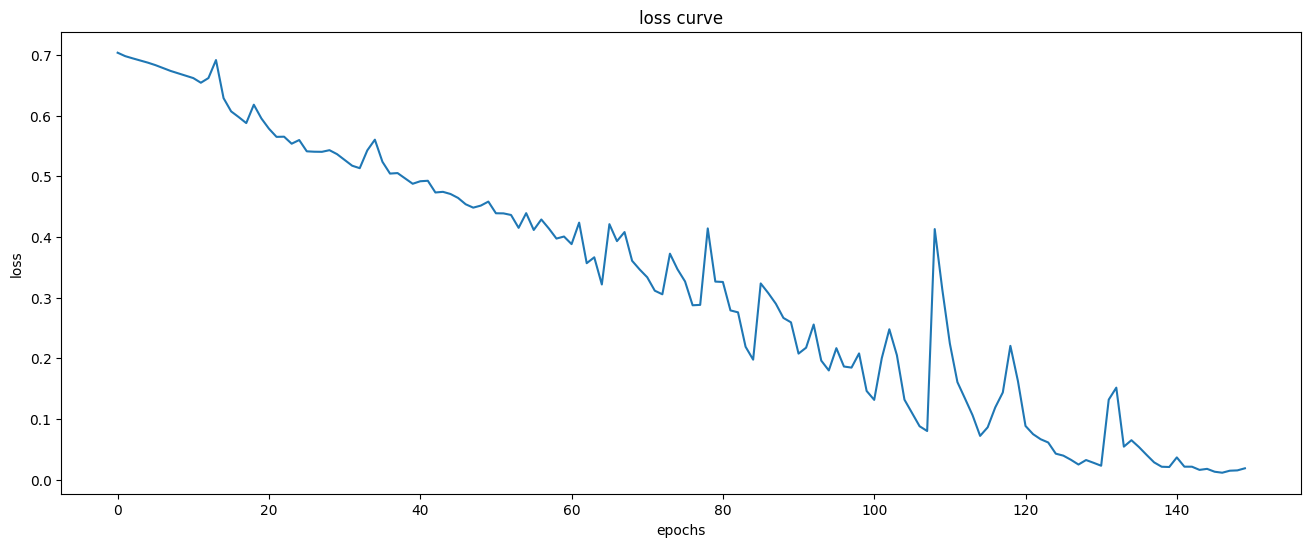

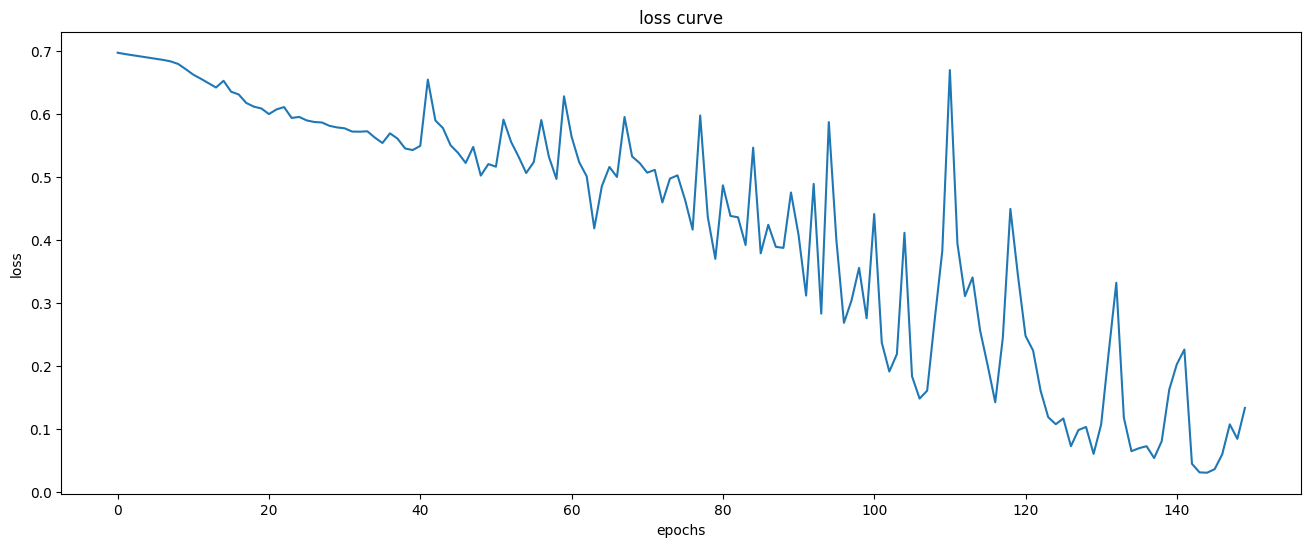

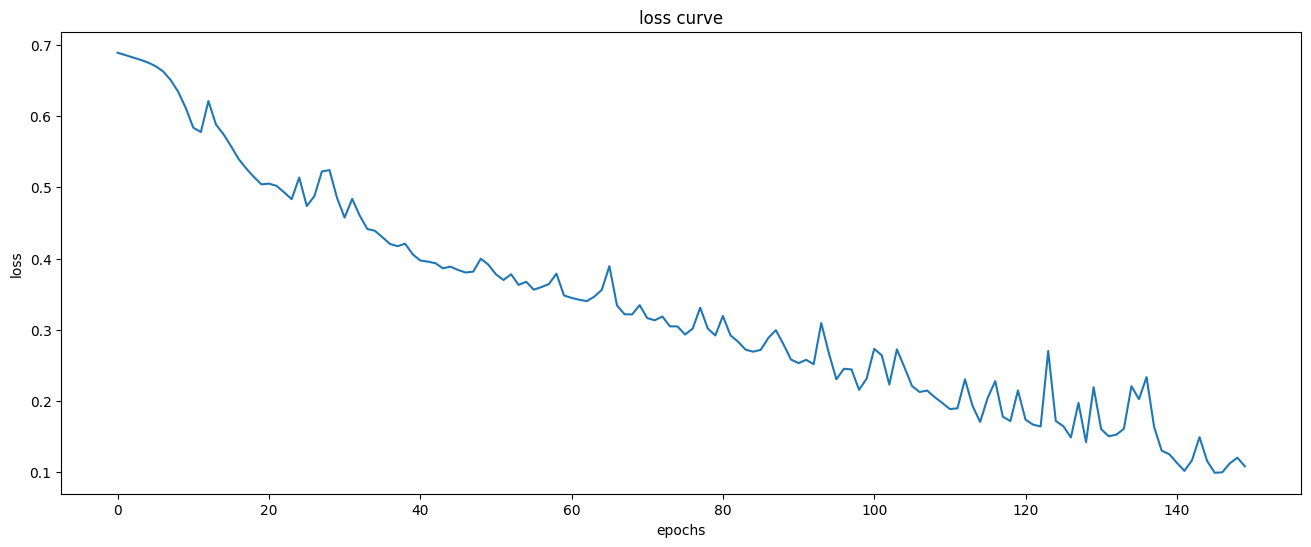

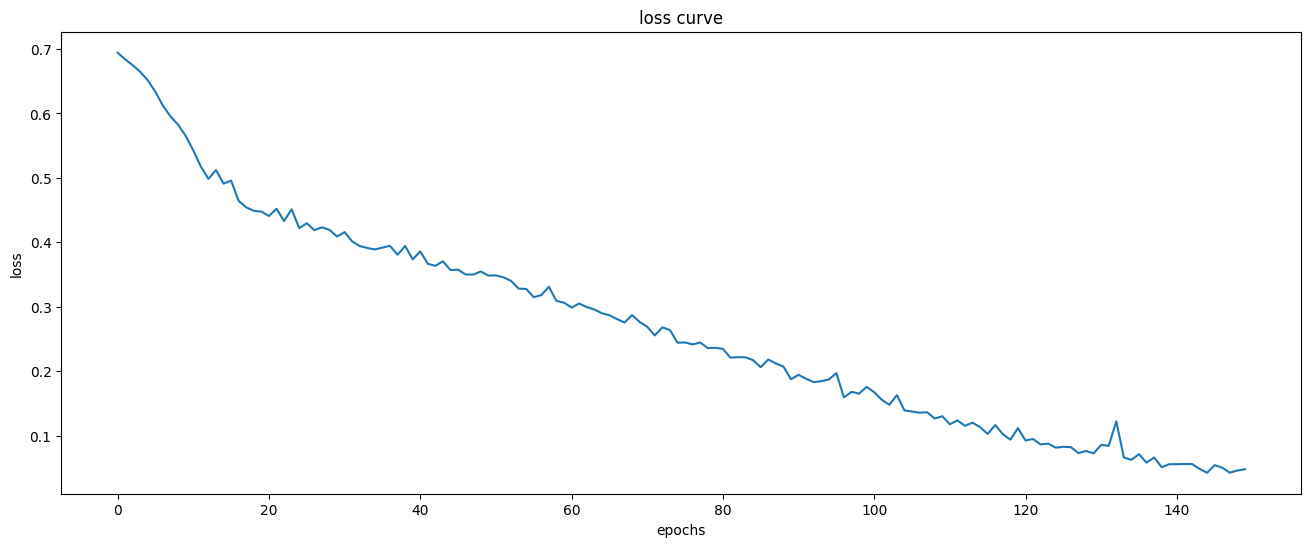

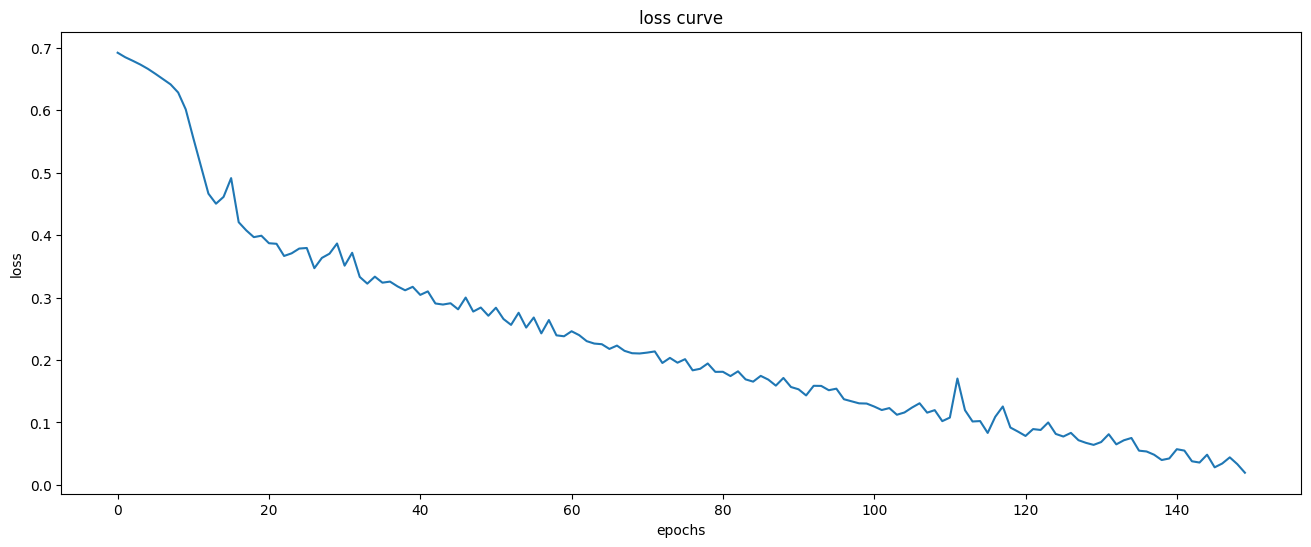

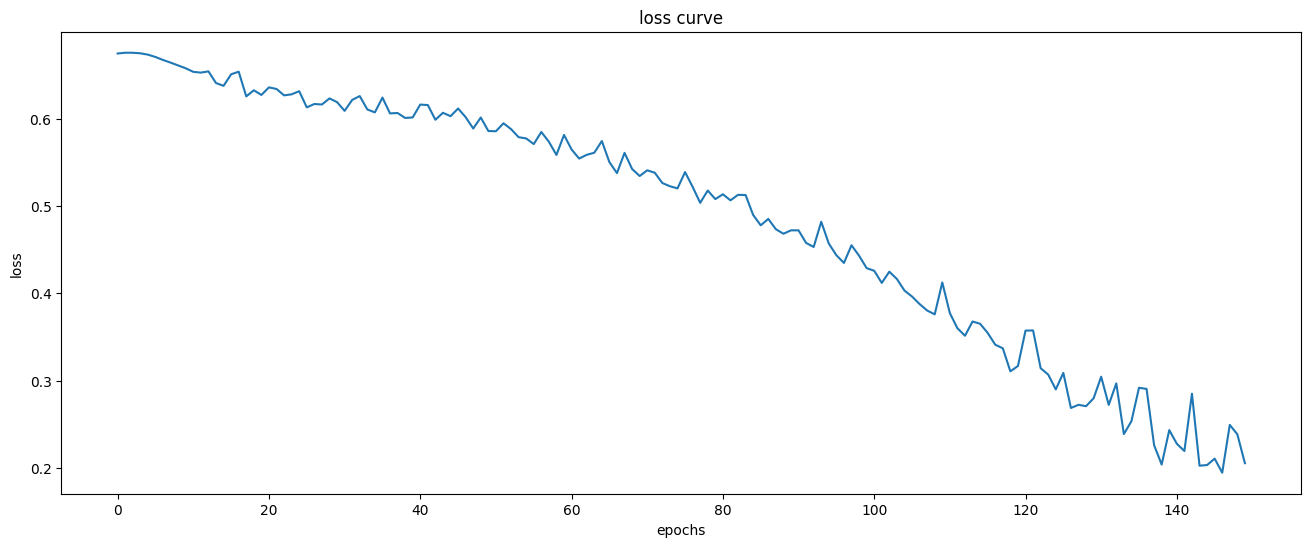

In [256]:
for i in range(len(loss_history)):
    plt.figure(figsize=(16,6))
    plt.plot(loss_history[i])
    plt.title("loss curve")
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()